In [25]:
# Initial imports

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/aman/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
data = pd.read_csv('data.csv', index_col=False)

In [4]:
del data['Unnamed: 0']

In [5]:
data.describe()

,Day #
count,1185.000000
mean,18.320675
std,14.031340
min,1.000000
25%,8.000000
50%,15.000000
75%,23.000000
max,58.000000


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment = DataFrame(columns=('Positive', 'Negative', 'Neutral', 'Compound'))
counter = 0
for article in data['Content']:
    article_compound = 0
    article_neg = 0
    article_pos = 0
    article_neu = 0
    counter = counter + 1
    try:
        sentences = sent_tokenize(article.decode('utf-8'))
        l = len(sentences)
    except:
        print counter
        sentences = ['test', 'test2 jh']
        l = 1000000000000
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        article_compound = article_compound + vs['compound']
        article_neg = article_neg + vs['neg']
        article_pos = article_pos + vs['pos']
        article_neu = article_neu + vs['neu']
    article_sentiment = DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Positive', 'Negative', 'Neutral', 'Compound'))
    sentiment = sentiment.append(article_sentiment, ignore_index = True)

823
832


In [7]:
sentiment.describe()

,Positive,Negative,Neutral,Compound
count,1185.000000,1185.000000,1.185000e+03,1185.000000
mean,0.051229,0.056308,8.906516e-01,-0.013193
std,0.028310,0.031011,5.467796e-02,0.132270
min,0.000000,0.000000,2.000000e-12,-0.513120
25%,0.031632,0.035733,8.670000e-01,-0.090564
50%,0.046667,0.052937,8.935333e-01,-0.016897
75%,0.065258,0.074667,9.217500e-01,0.065875
max,0.206846,0.184400,9.871667e-01,0.465990


In [18]:
sentiment.isnull().any()

Positive    False
Negative    False
Neutral     False
Compound    False
dtype: bool

In [19]:
final_data = pd.concat([data, sentiment], axis=1)

In [21]:
final_data.to_csv('articles_with_sentiment_score.csv', encoding='utf-8')

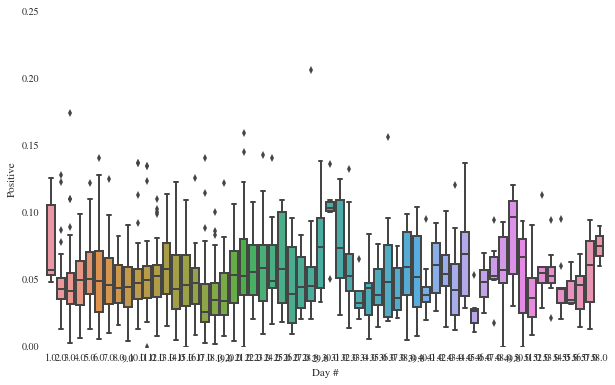

In [26]:
sns.boxplot(y=final_data['Positive'], x=final_data['Day #'])

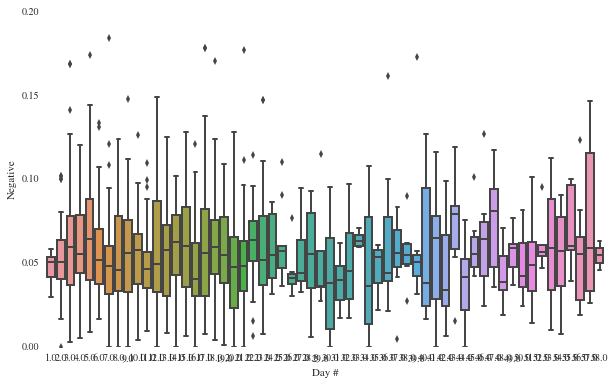

In [28]:
sns.boxplot(y=final_data['Negative'], x=final_data['Day #'])